In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('housing/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5184,-118.27,33.94,38.0,1314.0,318.0,1080.0,285.0,1.5872,89800.0,<1H OCEAN
6871,-118.09,34.07,45.0,593.0,133.0,481.0,128.0,2.5938,199300.0,<1H OCEAN
675,-122.17,37.69,24.0,2262.0,391.0,1125.0,366.0,4.7609,212600.0,NEAR BAY
3950,-118.62,34.20,23.0,3098.0,542.0,1486.0,492.0,5.7613,235800.0,<1H OCEAN
16163,-122.50,37.77,52.0,1769.0,414.0,1032.0,380.0,3.9954,324700.0,NEAR BAY


In [3]:
housing_data = housing_data.dropna()

In [5]:
housing_data.shape

(20433, 10)

In [6]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [7]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [8]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [13]:
housing_data.shape

(19475, 14)

In [14]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2854,-118.95,35.38,30.0,2594.0,478.0,1419.0,480.0,3.7250,83100.0,0,1,0,0,0
4913,-118.27,34.01,43.0,1235.0,385.0,1745.0,372.0,2.0817,113300.0,1,0,0,0,0
11799,-121.27,38.87,16.0,2094.0,358.0,1092.0,357.0,4.4769,191400.0,0,1,0,0,0
9246,-120.06,36.97,38.0,1542.0,364.0,1220.0,334.0,1.6250,52800.0,0,1,0,0,0
5820,-118.25,34.12,21.0,739.0,265.0,861.0,246.0,2.4856,181300.0,1,0,0,0,0


We can use same dataset for classification by calculating the median of housing prices and try to predict whether a particular neighbourhood will have a house above the median value or below.

In [15]:
median = housing_data['median_house_value'].median()

median

173800.0

In [16]:
# Add column

housing_data['above_median'] = (housing_data['median_house_value'] - median) > 0

In [17]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,above_median
5221,-118.24,33.95,21.0,1260.0,342.0,1167.0,310.0,0.9708,107600.0,1,0,0,0,0,False
13016,-121.18,38.69,7.0,7104.0,970.0,2772.0,920.0,6.3528,274500.0,0,1,0,0,0,True
2977,-119.06,35.32,15.0,3944.0,746.0,2355.0,757.0,3.5690,70700.0,0,1,0,0,0,False
979,-121.87,37.67,10.0,4337.0,800.0,1813.0,743.0,5.5000,247200.0,0,1,0,0,0,True
7084,-118.02,33.93,33.0,4711.0,988.0,2984.0,931.0,3.6028,184700.0,1,0,0,0,0,True


In [18]:
X = housing_data.drop(['median_house_value','above_median'],axis=1)
Y = housing_data['above_median']

Binary Classification problem

In [19]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [26]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [27]:
y_train.shape, y_test.shape

((15580,), (3895,))

Instantiating LogisticRegression estimator object

The algorithm to use in the optimization problem - the **liblinear solver** is a good choice for small datasets(20k) and binary classification

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear').fit(x_train,y_train)

In [29]:
print('Training score: ', logistic_model.score(x_train,y_train))

Training score:  0.8218870346598203


For classification problems, the default score is determined by accuracy - how many of the model predictions were correct?

In [30]:
y_pred = logistic_model.predict(x_test)

In [31]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
3616,True,False
13048,False,False
7954,False,False
1118,False,False
16416,False,False
15227,True,True
9960,True,True
8054,False,False
9517,False,False
5932,True,True


In [32]:
# Know the accuracy

from sklearn.metrics import accuracy_score

print('Training_score: ', accuracy_score(y_test, y_pred))

Training_score:  0.8192554557124518


In [34]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

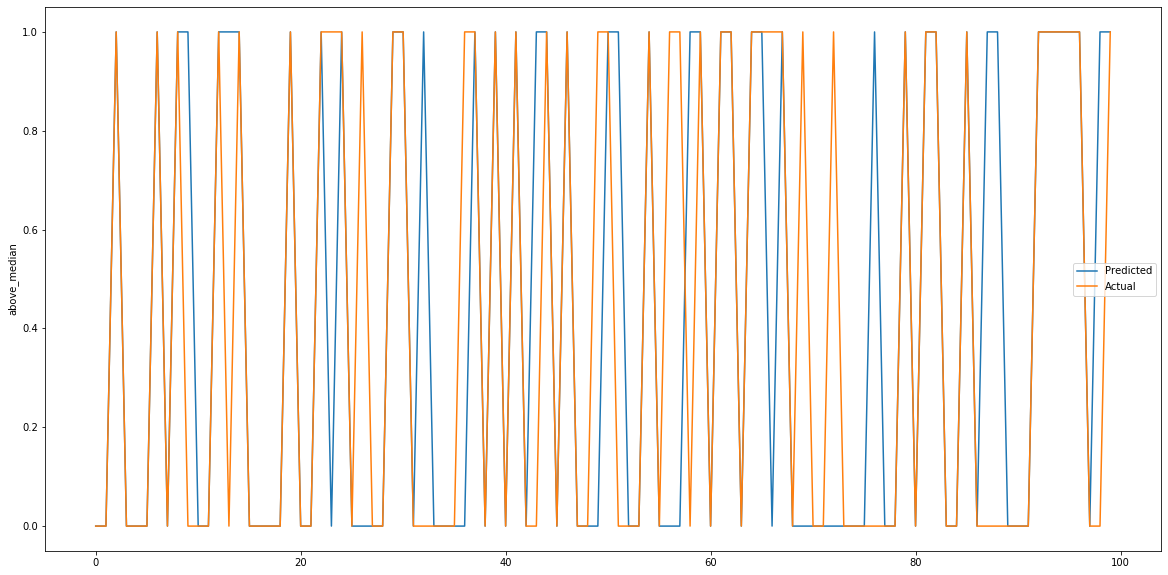

In [35]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('above_median')

plt.legend()
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(confusion_matrix(y_test, y_pred))

[[1626  357]
 [ 347 1565]]


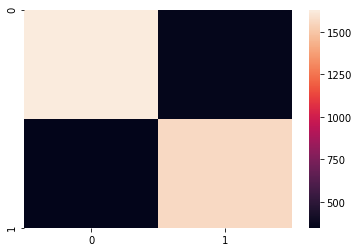

In [47]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)))
plt.show()

Precision score means the the level up-to which the prediction made by the model is precise.

Recall is the amount up-to which the model can predict the outcome. 

Confusion matrix is a table which describes the performance of a prediction model.

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1983
        True       0.81      0.82      0.82      1912

    accuracy                           0.82      3895
   macro avg       0.82      0.82      0.82      3895
weighted avg       0.82      0.82      0.82      3895

